In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Imports and Functions

In [1]:
import seaborn as sns
import pandas as pd

def plot_corr_matrix(data):
    corr = data.corr()
    plt.figure(figsize=(25, 20))
    sns.heatmap(corr, annot=True,mask=np.triu(corr), cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show() 

In [4]:
CSV_FOLDER_NAME = "CNC Mill Tool Wear"

# Lag en liste med filene som du ønsker å lese inn
csv_files = ['experiment_01.csv', 'experiment_02.csv', 'experiment_03.csv', 'experiment_04.csv', 'experiment_05.csv']  # Legg til alle CSV-filer her

# Lag en tom liste som skal inneholde dataene
dfs = []

# Les inn hver CSV-fil og legg den til i listen
for file in csv_files:
    csv_filepath = os.path.join(CSV_FOLDER_NAME, file)
    df = pd.read_csv(csv_filepath)  # Les inn CSV-filen til en DataFrame
    dfs.append(df)  # Legg til DataFrame-en i listen

# Slå sammen alle DataFrames til én
raw_data = pd.concat(dfs, ignore_index=True)


pd.set_option('display.max_columns', None) # Option to print all collumns


In [5]:
raw_data.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5238 entries, 0 to 5237
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          5238 non-null   float64
 1   X1_ActualVelocity          5238 non-null   float64
 2   X1_ActualAcceleration      5238 non-null   float64
 3   X1_CommandPosition         5238 non-null   float64
 4   X1_CommandVelocity         5238 non-null   float64
 5   X1_CommandAcceleration     5238 non-null   float64
 6   X1_CurrentFeedback         5238 non-null   float64
 7   X1_DCBusVoltage            5238 non-null   float64
 8   X1_OutputCurrent           5238 non-null   float64
 9   X1_OutputVoltage           5238 non-null   float64
 10  X1_OutputPower             5238 non-null   float64
 11  Y1_ActualPosition          5238 non-null   float64
 12  Y1_ActualVelocity          5238 non-null   float64
 13  Y1_ActualAcceleration      5238 non-null   float

### Inspect the object

In [7]:
print(raw_data['Machining_Process'].unique())

['Starting' 'Prep' 'Layer 1 Up' 'Layer 1 Down' 'Repositioning'
 'Layer 2 Up' 'Layer 2 Down' 'Layer 3 Up' 'Layer 3 Down' 'end' 'End']


In [8]:
raw_data.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE
count,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5.238000e+03,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5.238000e+03,5238.000000,5238.000000,5.238000e+03,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.0,5238.0,5238.0,5238.0,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5.238000e+03,5238.000000,5.238000e+03,5238.000000,5238.000000,5238.000000,5238.0,5238.000000,5238.000000,5238.000000
mean,170.928026,-0.322168,2.803666,170.931271,-0.311994,0.894893,-0.433103,5.274296e-02,326.835433,7.278585,0.000724,117.315903,-0.475214,1.750267,117.313784,-0.457157,2.130539,-0.032174,5.025662e-02,326.513555,6.571636,7.930302e-04,69.751680,-0.361403,1.081310,69.748454,-0.359370,0.754296,0.0,0.0,0.0,0.0,-63.686249,26.722405,0.112664,-63.458627,26.348435,5.345552e-01,10.513985,4.660950e-01,324.103666,58.418737,0.088200,12.0,1.016609,31.284842,23.486445
std,24.008447,6.612358,104.130858,24.013193,6.631079,86.501002,3.988959,4.674771e-02,1.495467,9.469569,0.001933,36.165823,7.210543,91.801753,36.164734,7.191426,96.050544,4.192680,5.357973e-02,2.681293,10.418307,2.562432e-03,43.381861,8.686628,72.715964,43.380376,8.709355,63.691786,0.0,0.0,0.0,0.0,1105.742985,26.502698,26.053652,1105.785140,26.605691,7.292456e+00,11.554730,4.904677e-01,5.034589,58.952649,0.090886,0.0,0.766836,41.569134,20.827921
min,141.000000,-20.400000,-1190.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,-0.006060,72.400000,-32.700000,-1210.000000,72.400000,-32.400000,-1000.000000,-20.000000,2.680000e-19,319.000000,0.000000,-4.920000e-03,27.500000,-50.300000,-1170.000000,27.500000,-50.000000,-1000.000000,0.0,0.0,0.0,0.0,-2150.000000,-0.013500,-106.000000,-2150.000000,0.000000,-9.540000e-07,-6.270000,0.000000e+00,290.000000,0.000000,-0.002010,12.0,0.000000,0.000000,6.000000
25%,149.000000,-0.125000,-12.500000,149.000000,0.000000,0.000000,-3.060000,1.800000e-02,326.000000,0.691250,0.000000,79.625000,-0.025000,-12.500000,79.700000,0.000000,0.000000,-1.330000,1.470000e-02,325.000000,0.472250,-4.497500e-08,28.500000,0.000000,0.000000,28.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,-1160.000000,0.000000,-1.310000,-1160.000000,0.000000,0.000000e+00,0.054000,2.750000e-19,320.000000,0.000000,0.000000,12.0,1.000000,0.000000,6.000000
50%,161.000000,0.000000,0.000000,161.000000,0.000000,0.000000,-0.321000,4.360000e-02,326.000000,3.200000,0.000002,104.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.057650,2.380000e-02,325.000000,2.415000,3.395000e-07,46.950000,0.000000,0.000000,47.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,205.000000,29.200000,0.000000,206.000000,0.000000,0.000000e+00,1.895000,2.780000e-19,323.000000,0.000000,0.000445,12.0,1.000000,2.000000,6.000000
75%,198.000000,0.025000,12.500000,198.000000,0.000000,0.000000,1.120000,8.940000e-02,328.000000,12.900000,0.000997,158.000000,0.025000,12.500000,158.000000,0.000000,0.000000,1.337500,8.590000e-02,328.000000,9.410000,4.315000e-04,119.000000,0.000000,0.000000,119.000000,

In [9]:
# Look for missing data
missing_data = raw_data.isna().sum().sum()
print(f"Amount of missing data: {missing_data}")

Amount of missing data: 0


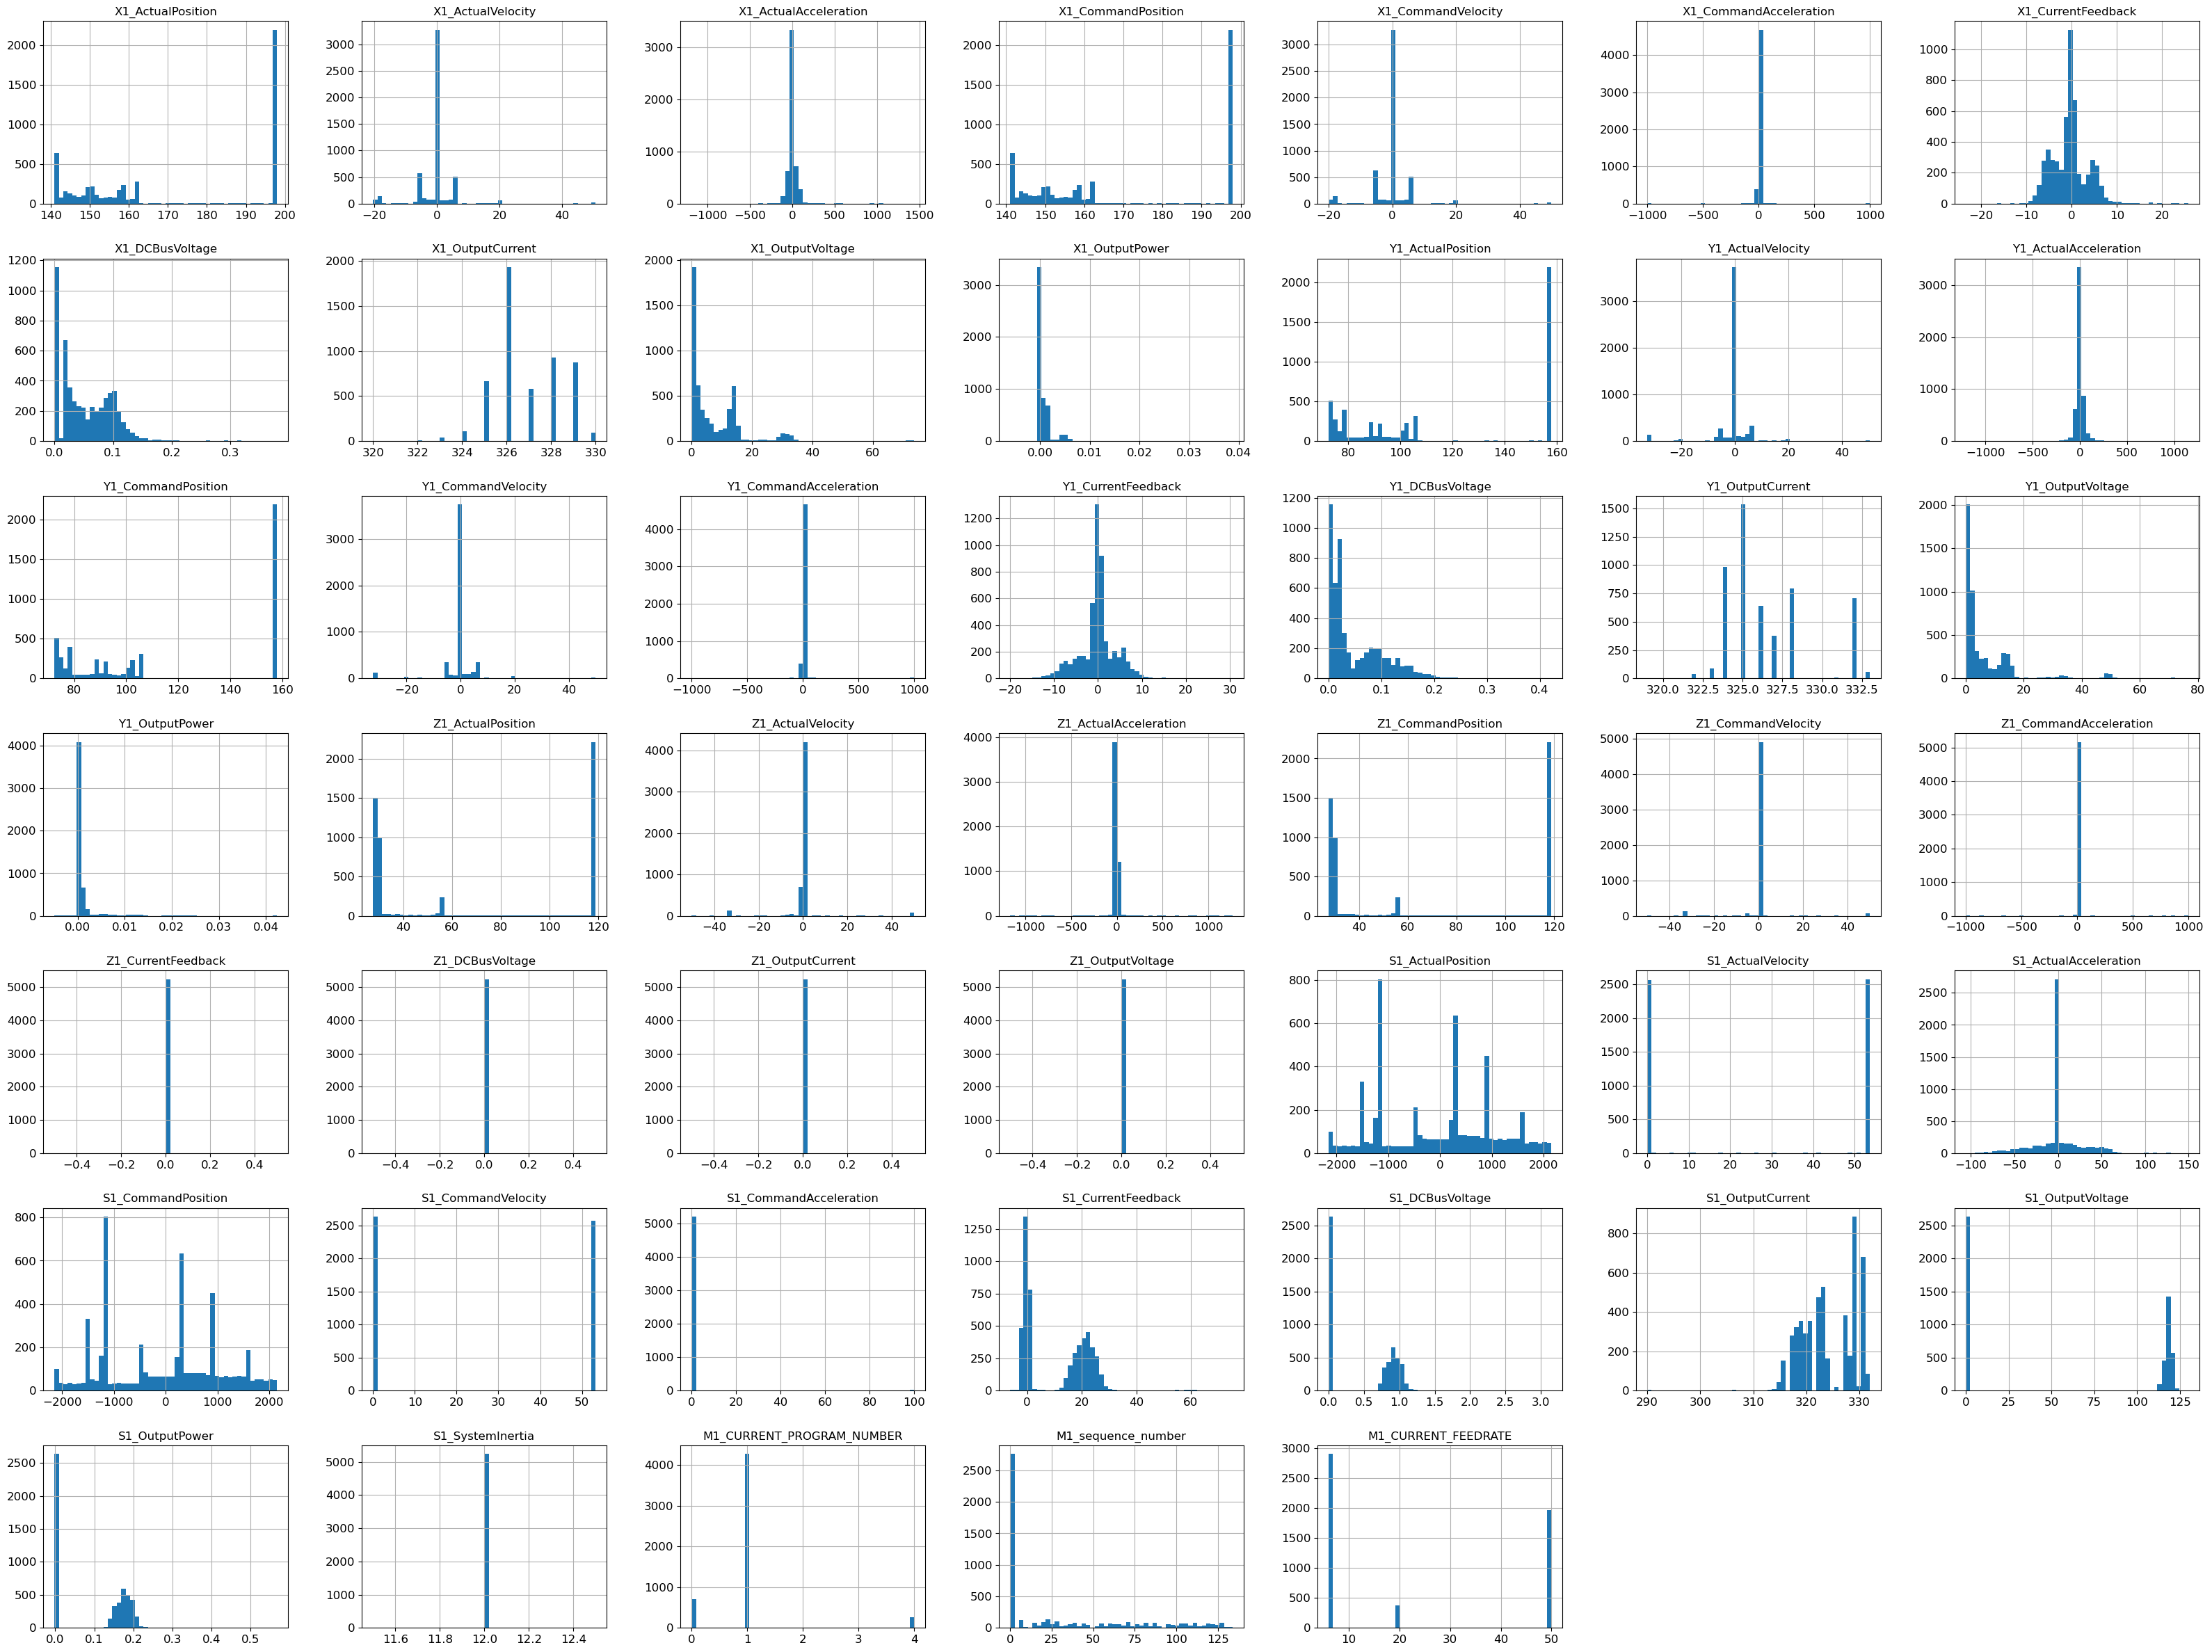

In [10]:
raw_data.hist(bins=50, figsize=(40,30))
plt.show()

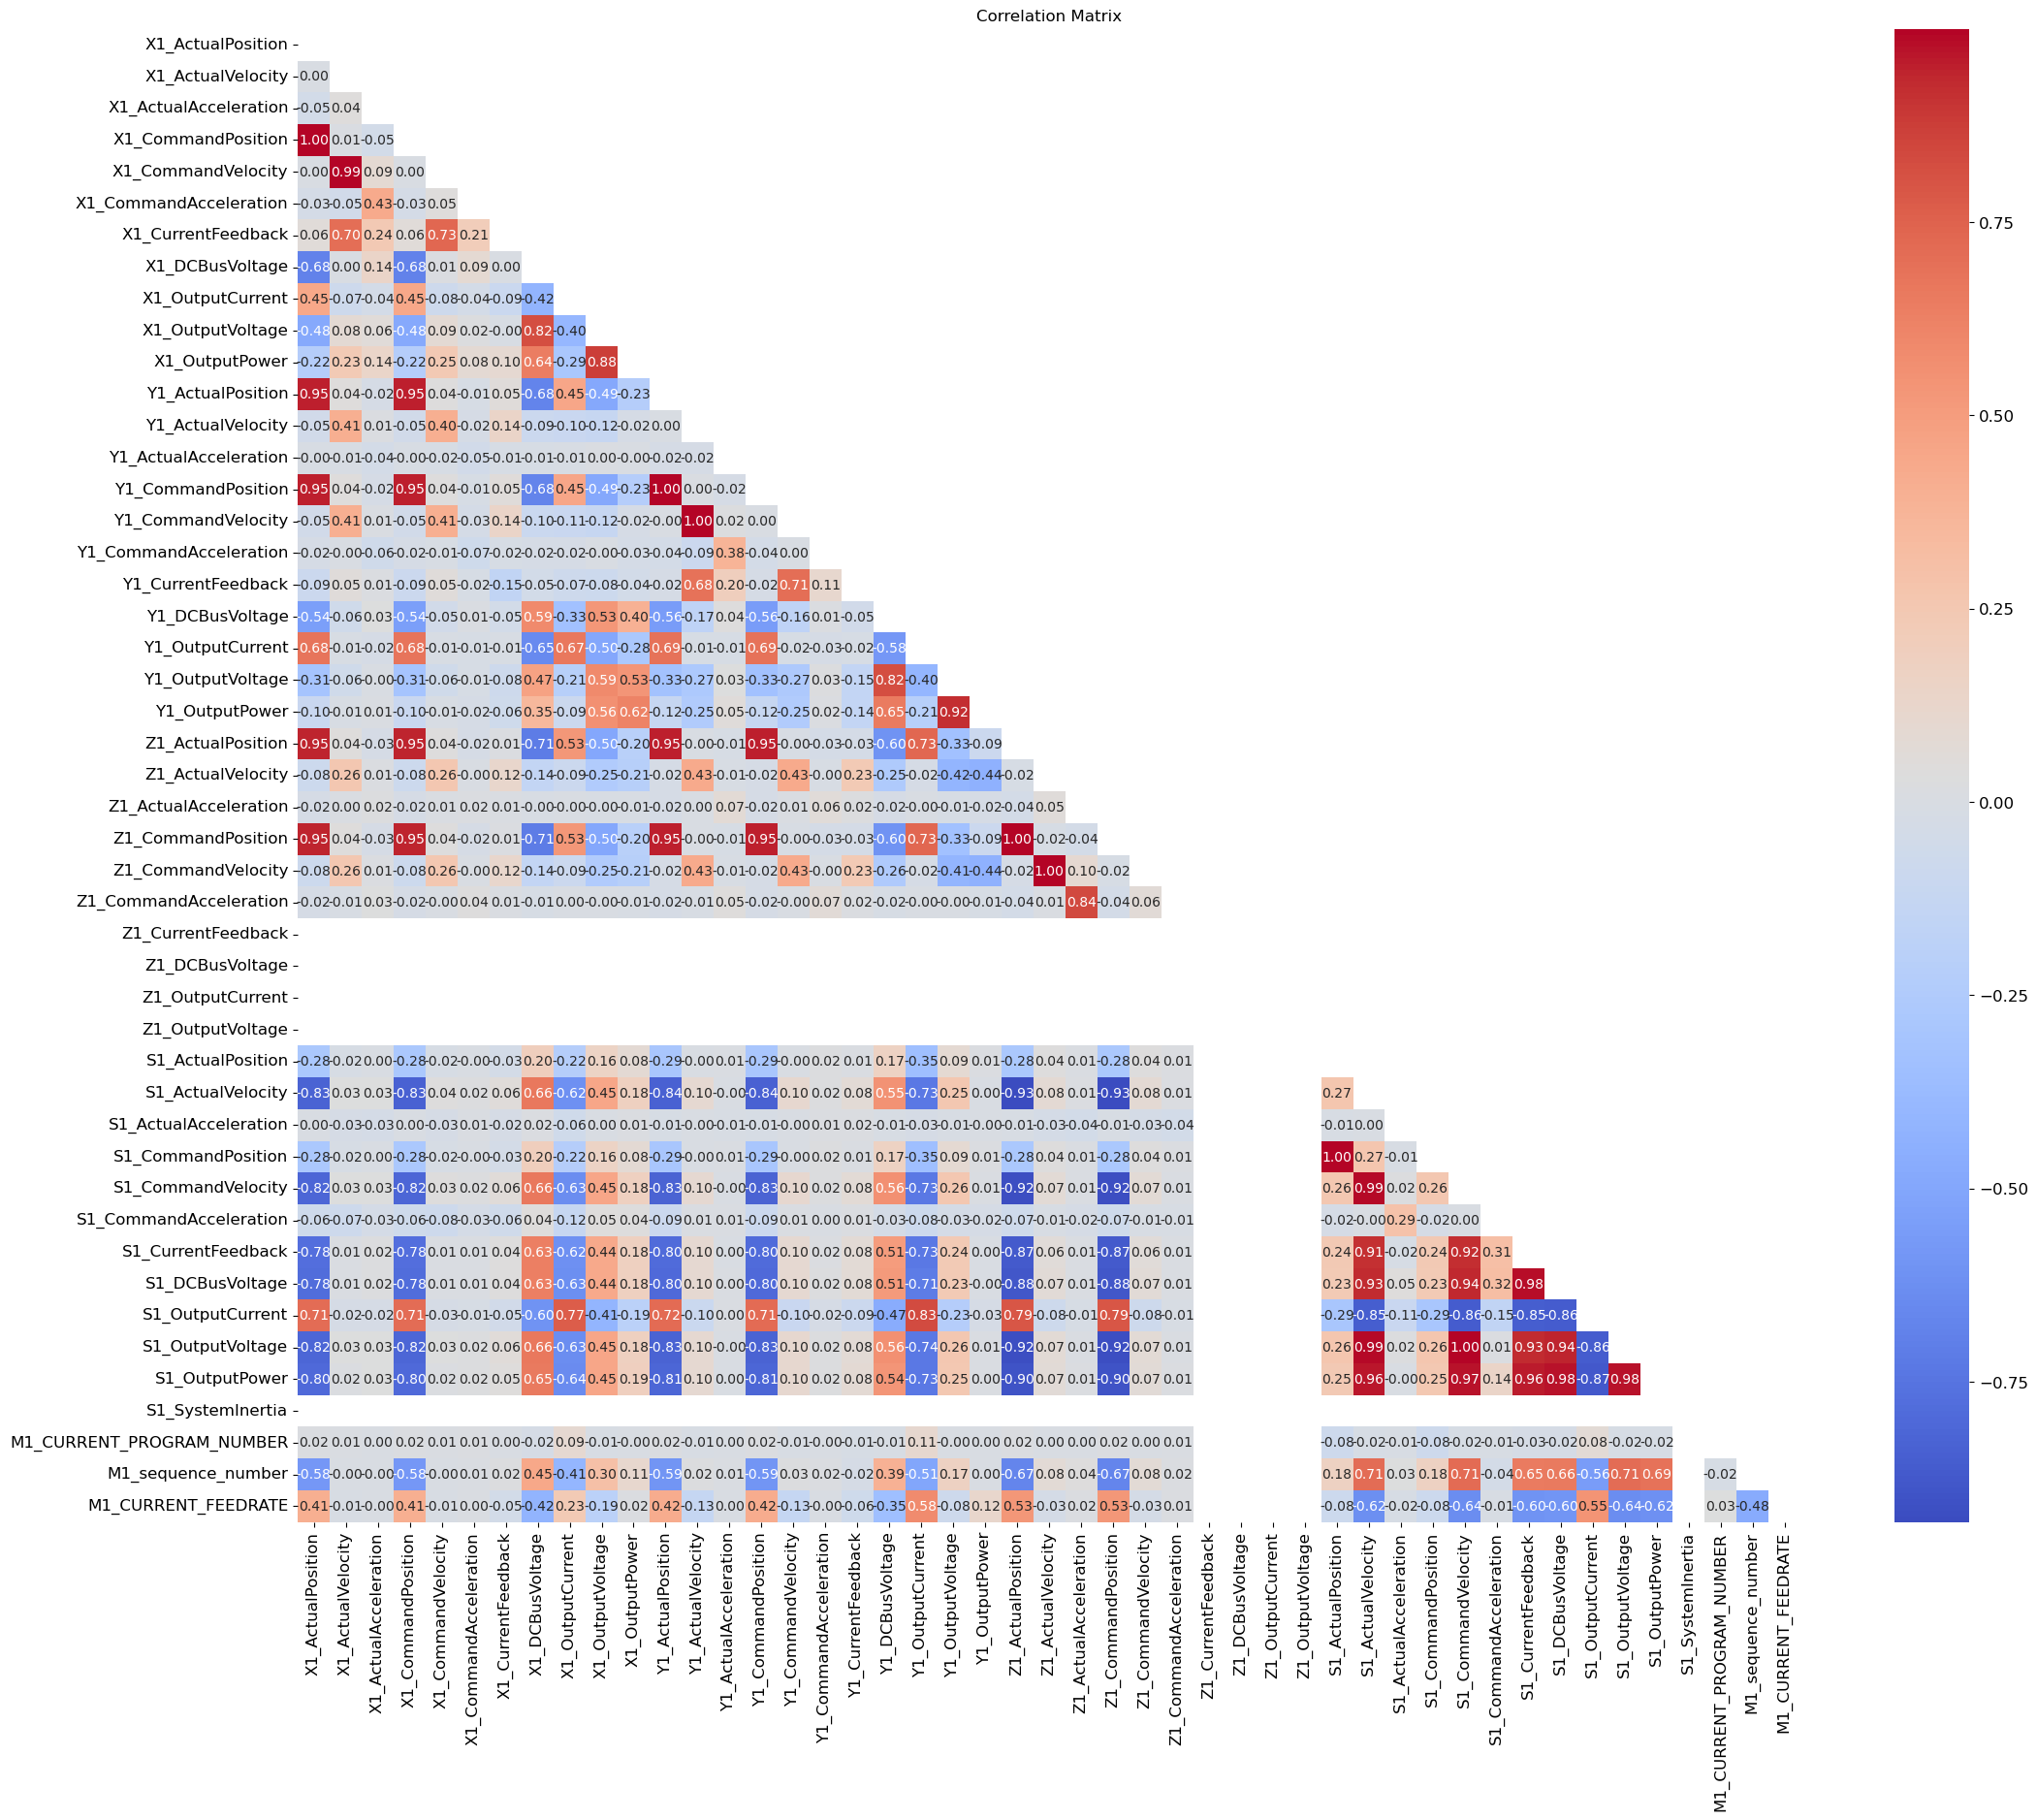

In [11]:
plot_corr_matrix(raw_data.drop('Machining_Process', axis=1))

### Transform the object to one hot encoded values.

In [12]:
def one_hot_encode(data):
    '''Converts the Machining_Process object collumn to one hot columns'''
    # One-hot encoding
    one_hot = pd.get_dummies(data.copy(), columns=['Machining_Process'])

    # Get number of unique types
    num_process_steps = len(data['Machining_Process'].unique())

    # Convert one hot (last 9 columns) from bool to int
    one_hot.iloc[:, -num_process_steps:] = one_hot.iloc[:, -num_process_steps:].astype(int)

    return one_hot


data_one_hot = one_hot_encode(raw_data)
data_one_hot

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process_End,Machining_Process_Layer 1 Down,Machining_Process_Layer 1 Up,Machining_Process_Layer 2 Down,Machining_Process_Layer 2 Up,Machining_Process_Layer 3 Down,Machining_Process_Layer 3 Up,Machining_Process_Prep,Machining_Process_Repositioning,Machining_Process_Starting,Machining_Process_end
0,198.0,0.00,0.00,198.0,0.0,0.000000,0.180,0.0207,329.0,2.770,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.5390,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.00100,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,0,0,0,0,0,0,0,0,0,1,0
1,198.0,-10.80,-350.00,198.0,-13.6,-358.000000,-10.900,0.1860,328.0,23.300,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.5000,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.00000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,0,0,0,0,0,0,0,1,0,0,0
2,196.0,-17.80,-6.25,196.0,-17.9,-0.000095,-8.590,0.1400,328.0,30.600,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.7900,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.00000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,0,0,0,0,0,0,0,1,0,0,0
3,194.0,-18.00,0.00,194.0,-17.9,-0.000095,-6.110,0.1300,327.0,30.300,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.1300,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.00100,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,0,0,0,0,0,0,0,1,0,0,0
4,193.0,-17.90,-18.80,192.0,-17.9,0.000095,-5.700,0.1140,328.0,30.500,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.8000,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.00000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,152.0,0.00,0.00,152.0,0.0,0.000000,0.555,0.0226,327.0,2.220,-0.000001,105.0,0.000,0.00,105.0,0.0,0.000000,-1.0200,0.0255,326.0,2.35,-2.220000e-06,73.7,49.9,-6.25,74.1,50.0,0.000000,0.0,0.0,0.0,0.0,-1220.0,0.00175,0.438,-1220.0,0.0,0.0,-0.332,2.770000e-19,326.0,0.0,0.000000e+00,12.0,1.0,0.0,50.0,1,0,0,0,0,0,0,0,0,0,0
5234,152.0,0.00,0.00,152.0,0.0,0.000000,1.670,0.0268,327.0,3.000,0.000000,105.0,0.025,12.50,105.0,0.0,0.000000,-0.2540,0.0228,325.0,3.80,-4.110000e-06,78.7,50.0,25.00,79.1,50.0,0.000000,0.0,0.0,0.0,0.0,-1220.0,0.00100,0.250,-1220.0,0.0,0.0,-0.518,2.770000e-19,326.0,0.0,0.000000e+00,12.0,1.0,0.0,50.0,1,0,0,0,0,0,0,0,0,0,0
5235,152.0,0.05,18.80,152.0,0.0,0.000000,0.544,0.0274,327.0,1.510,0.000000,105.0,0.000,0.00,105.0,0.0,0.000000,-1.5300,0.0193,325.0,1.37,-6.030000e-06,83.6,49.9,18.80,84.1,50.0,0.000000,0.0,0.0,0.0,0.0,-1220.0,0.00100,0.000,-1220.0,0.0,0.0,-1.000,2.770000e-

Note that some variables will not accurately reflect the operation of the CNC machine. This can usually be detected by when M1_CURRENT_FEEDRATE reads 50, when X1 ActualPosition reads 198, or when M1_CURRENT_PROGRAM_NUMBER does not read 0. The source of these errors has not been identified.

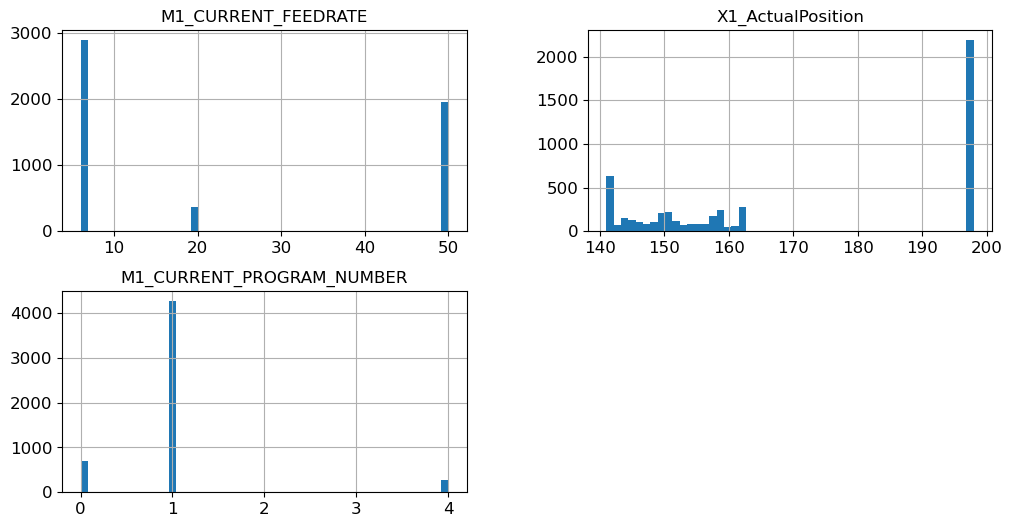

In [13]:
raw_data[['M1_CURRENT_FEEDRATE', 'X1_ActualPosition', 'M1_CURRENT_PROGRAM_NUMBER']].hist(bins=50, figsize=(12,6))
plt.show()

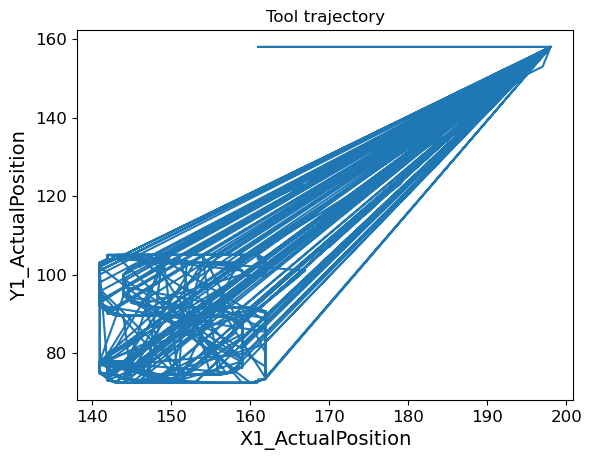

In [14]:
def plot_attributes(data, x_name, y_name, title=""):
    plt.plot(data['X1_ActualPosition'], data['Y1_ActualPosition'])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.show()

# plot_attributes(raw_data, x_name="X1_ActualPosition", y_name="Y1_ActualPosition", title="Tool trajectory")


# ['Starting' 'Prep' 'Layer 1 Up' 'Layer 1 Down' 'Repositioning'
#  'Layer 2 Up' 'Layer 2 Down' 'Layer 3 Up' 'Layer 3 Down' 'end' 'End']

def remove_unwanted_stages(data):
    values_to_keep = ['Layer 1 Up', 'Layer 1 Down', 'Layer 2 Up', 'Layer 2 Down','Layer 3 Up', 'Layer 3 Down']
    filtered_data = data[data['Machining_Process'].isin(values_to_keep)]
    return filtered_data


filtered_data = remove_unwanted_stages(raw_data)

plot_attributes(filtered_data, x_name="X1_ActualPosition", y_name="Y1_ActualPosition", title="Tool trajectory")

# Combine features

In [15]:
def add_difference_and_remove_command(df):
   
    new_df = df.copy()
    
    # Finn alle 'Command' kolonner
    command_cols = [col for col in df.columns if 'Command' in col]
    
    for command_col in command_cols:
        # Finn tilhørende 'Actual' kolonne (erstatte 'Command' med 'Actual')
        actual_col = command_col.replace('Command', 'Actual')
        
        # Sjekk om den tilhørende 'Actual' kolonnen finnes
        if actual_col in df.columns:
            # Lag en ny differansekolonne
            diff_col_name = command_col.replace('Command', 'Diff')
            new_df[diff_col_name] = new_df[actual_col] - new_df[command_col]
    
    # Fjern alle 'Command' kolonner
    new_df.drop(columns=command_cols, inplace=True)
    
    return new_df

# Bruk funksjonen på datasettet
raw_data_transformed = add_difference_and_remove_command(raw_data)

raw_data_transformed.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,X1_DiffPosition,X1_DiffVelocity,X1_DiffAcceleration,Y1_DiffPosition,Y1_DiffVelocity,Y1_DiffAcceleration,Z1_DiffPosition,Z1_DiffVelocity,Z1_DiffAcceleration,S1_DiffPosition,S1_DiffVelocity,S1_DiffAcceleration
0,198.0,0.0,0.00,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0.0,0.0,0.000000,0.0,-0.025,-6.250000,0.0,0.0,0.000000,0.0,0.001,0.250
1,198.0,-10.8,-350.00,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0.0,2.8,8.000000,1.0,4.800,-103.000000,1.0,5.3,-38.000000,0.0,0.000,0.250
2,196.0,-17.8,-6.25,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0.0,0.1,-6.249905,0.0,-0.200,0.000095,0.0,0.0,37.500095,0.0,0.000,-0.438
3,194.0,-18.0,0.00,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0.0,-0.1,0.000095,0.0,-0.300,-62.499905,0.0,0.0,-6.250000,0.0,-0.001,-0.250
4,193.0,-17.9,-18.80,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1.0,0.0,-18.800095,0.0,0.300,137.999905,1.0,0.1,18.800000,0.0,0.000,-0.188


# Pipeline for data processing

In [16]:
from sklearn.preprocessing import StandardScaler

def processing_pipeline(data):
    data = remove_unwanted_stages(data)
    data = add_difference_and_remove_command(data)
    data = one_hot_encode(data)

    # Scale all except 6 last one hot columns 
    scaler = StandardScaler()
    data.iloc[:, :-6] = scaler.fit_transform(data.iloc[:, :-6])

    return data


processed_data = processing_pipeline(raw_data)
processed_data

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,X1_DiffPosition,X1_DiffVelocity,X1_DiffAcceleration,Y1_DiffPosition,Y1_DiffVelocity,Y1_DiffAcceleration,Z1_DiffPosition,Z1_DiffVelocity,Z1_DiffAcceleration,S1_DiffPosition,S1_DiffVelocity,S1_DiffAcceleration,Machining_Process_Layer 1 Down,Machining_Process_Layer 1 Up,Machining_Process_Layer 2 Down,Machining_Process_Layer 2 Up,Machining_Process_Layer 3 Down,Machining_Process_Layer 3 Up
31,-0.683899,0.045756,0.322936,0.287701,-0.427044,0.201718,-0.712393,-0.425024,-1.108932,-0.012646,0.070649,-0.090702,-0.688640,-0.481031,-0.534515,-0.334000,-0.744147,-0.897799,-0.456991,0.0,0.0,0.0,0.0,-0.360812,-0.621669,3.478379,3.798907,4.083632,-1.033394,-0.434728,0.487554,0.0,-0.021629,-0.586113,-0.732445,0.010885,0.130474,0.327161,0.010668,0.062583,0.077311,1.642794,0.361146,-0.603886,0.233634,-0.355165,-0.052129,0,1,0,0,0,0
32,-0.683899,0.020957,-0.364915,0.236876,-0.524281,-1.144691,-0.395545,-0.427415,-1.108932,-0.029396,-0.366344,0.398110,-0.669303,-0.856059,-0.682568,-0.336657,-0.760654,-0.885359,-0.243393,0.0,0.0,0.0,0.0,-0.358919,-0.217050,3.130313,3.626387,3.777344,-1.228541,0.047184,1.386105,0.0,-0.021629,-0.539245,-0.732445,0.010885,-0.086079,-0.346173,0.010668,-0.081714,-0.265404,-0.025553,-8.464080,-19.316807,0.233634,-0.323815,-0.418072,0,1,0,0,0,0
33,-0.683899,-0.958627,0.036331,-1.844562,0.882413,-2.491099,0.286717,0.334866,-1.108932,-0.008458,0.288855,-0.090491,-0.545545,-1.606117,-0.615888,-0.334036,-0.760654,0.016548,-0.029795,0.0,0.0,0.0,0.0,-0.356079,0.152887,3.499690,4.256086,4.185728,-2.789718,0.316640,2.606359,0.0,-0.021629,-0.539245,-0.732445,1.574474,0.022198,0.046605,0.010668,0.098657,0.248441,-0.025553,0.035291,0.007248,-0.590690,-0.323815,-0.029724,0,1,0,0,0,0
34,-0.726753,-0.983427,-0.422695,-1.445565,0.940755,-3.164303,0.437046,0.334866,-1.108932,-0.008458,0.216702,-0.015500,-0.386980,-1.606117,-0.594414,-0.336739,-0.760654,0.016548,-0.029795,0.0,0.0,0.0,0.0,-0.352294,0.538237,4.426683,3.997306,4.267404,-3.375160,0.672460,3.715681,0.0,-0.021629,-0.539245,-0.732445,0.010885,-0.194355,-0.402733,0.010668,0.098657,0.191854,-0.025553,0.035291,0.007248,-0.590690,-0.323815,0.944880,0,1,0,0,0,0
35,-0.769608,-0.947054,0.552220,-1.504939,0.875931,-1.144691,0.749268,0.286330,-1.108932,-0.033583,-0.583968,0.210105,-0.640297,-0.856059,-0.485917,-0.335560,-0.760654,0.016548,-0.029795,0.0,0.0,0.0,0.0,-0.346615,0.838811,-1.824307,-0.283788,-0.349376,0.137489,0.724279,-0.348875,0.0,-0.021629,-0.539245,-0.732445,0.010885,0.123256,0.551605,0.010668,-0.117788,-0.436077,-0.025553,0.035291,0.007248,0.233634,0.021037,-1.893047,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,-0.726753,3.356502,-0.135632,1.706043,0.962364,-2.491099,2.691983,2.124627,-0.194218,-0.025208,-0.293027,-0.297037,-0.667369,-1.606117,-0.598935,-0.336440,-0.760654,0.028210,0.505055,0.0,0.0,0.0,0.0,-1.222093,0.827251,0.260185,0.650410,0.655249,-0.643100,0.862461,0.720512,0.0,-0.021629,-0.187729,-0.030922,0.010885,0.166566,-0.121728,0.010668,-0.045639,-0.207904,-0.025553,0.238950,0.772388,0.233634,-0.073014,0.298505,0,1,0,0,0,0
4854,-0.641045,1.565971,-10.476334,-1.174816,1.351311,-1.817895,-0.242904,-1.442761,-0.194218,-0.021021,-0.147557,-0.157679,-0.5938

In [17]:
def get_unworn_numbers():
    data = pd.read_csv("CNC Mill Tool Wear//train.csv")
    return data.loc[data['tool_condition'] == 'unworn', 'No'].tolist()

unworn_numbers = get_unworn_numbers()
print(unworn_numbers)

[1, 2, 3, 4, 5, 11, 12, 17]


# Gaussian Mixtures

In [18]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=21)

processed_train_data = processing_pipeline(raw_data)

gmm.fit(processed_train_data)

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\hakon\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\hakon\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\hakon\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 25: invalid start byte
c:\Users\hakon\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hakon\anaconda3\Lib\site-packa

GaussianMixture(n_components=3, random_state=21)

### Get test data

In [19]:
worn_data_test = pd.read_csv("CNC Mill Tool Wear//experiment_06.csv")
unworn_data_test = pd.read_csv("CNC Mill Tool Wear//experiment_12.csv")

processed_worn_data = processing_pipeline(worn_data_test)
processed_unworn_data = processing_pipeline(unworn_data_test)

C:\Users\hakon\AppData\Local\Temp\ipykernel_20292\597608797.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores_train, label="Normale data (treningsdata)", color='blue', shade=True, common_norm=False)
C:\Users\hakon\AppData\Local\Temp\ipykernel_20292\597608797.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores_test_warn, label="Worn", color='green', shade=True, common_norm=False)
C:\Users\hakon\AppData\Local\Temp\ipykernel_20292\597608797.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores_test_unwarn, label="Unworn", color='red', shade=True, common_norm=False)


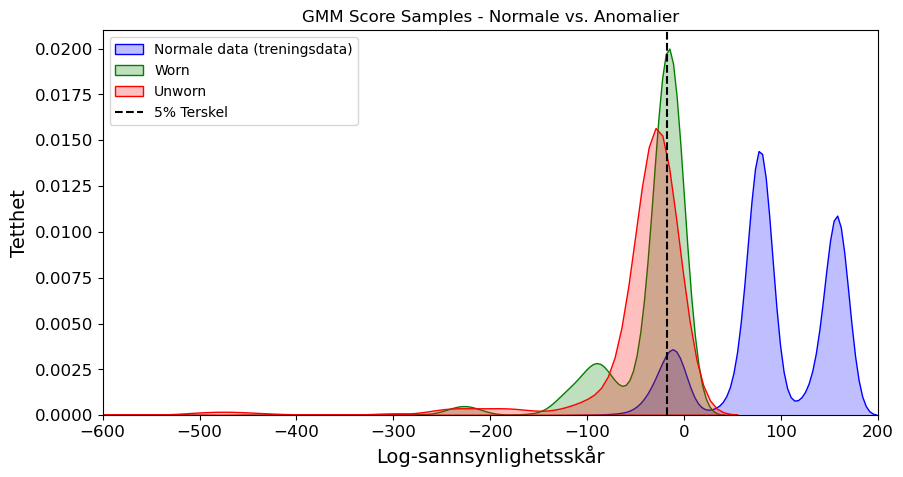

In [20]:
scores_train = gmm.score_samples(processed_train_data)

scores_test_warn = gmm.score_samples(processed_worn_data)
scores_test_unwarn = gmm.score_samples(processed_unworn_data)

# Plott med tetthetsgraf (density plot)
plt.figure(figsize=(10, 5))

# Bruk seaborn for å lage density plot (jevnere kurver) med felles normalisering
sns.kdeplot(scores_train, label="Normale data (treningsdata)", color='blue', shade=True, common_norm=False)
sns.kdeplot(scores_test_warn, label="Worn", color='green', shade=True, common_norm=False)
sns.kdeplot(scores_test_unwarn, label="Unworn", color='red', shade=True, common_norm=False)

# Legg til terskel-linje
threshold = np.percentile(scores_train, 5)
plt.axvline(threshold, color='black', linestyle='--', label="5% Terskel")

plt.xlim(-600, 200)

# Legg til etiketter og tittel
plt.xlabel("Log-sannsynlighetsskår")
plt.ylabel("Tetthet")
plt.title("GMM Score Samples - Normale vs. Anomalier")
plt.legend()
plt.show()